In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\aishw\OneDrive\Documents\Sample - Superstore.csv", parse_dates=['Order Date','Ship Date'])
df.columns = [c.strip().replace(' ','_') for c in df.columns]

# summary
print(df.info())
print(df.describe())

# monthly sales
df['Order_Month'] = df['Order_Date'].dt.to_period('M')
monthly = df.groupby(df['Order_Date'].dt.to_period('M')).agg({'Sales':'sum','Profit':'sum'}).reset_index()
monthly['Order_Date'] = monthly['Order_Date'].dt.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly['Order_Date'], monthly['Sales'])
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# top 10 products by sales
top_products = df.groupby('Product_Name')['Sales'].sum().nlargest(10)
print(top_products)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2944: invalid start byte

In [5]:
import pandas as pd

# try again with encoding specified
df = pd.read_csv(
    r"C:\Users\aishw\OneDrive\Documents\Sample - Superstore.csv",
    encoding='ISO-8859-1',      # fix for UnicodeDecodeError
    parse_dates=['Order Date','Ship Date']
)

df.columns = [c.strip().replace(' ','_') for c in df.columns]
print(df.head())


   Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal_Code  Region       Product_ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (re-use your already-loaded DataFrame)
df.columns = [c.strip().replace(' ', '_').replace('-', '_') for c in df.columns]

# 1️⃣ Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:\n", df.isna().sum())

# 2️⃣ Handle missing or bad values
# example: drop rows missing Order_ID or Sales
df = df.dropna(subset=['Order_ID', 'Sales'])

# ensure numeric types
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df[num_cols] = df[num_cols].fillna(0)

# 3️⃣ Add time-based columns
df['Order_Year']  = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Quarter'] = df['Order_Date'].dt.quarter
df['Order_MonthName'] = df['Order_Date'].dt.strftime('%b')

# 4️⃣ Quick descriptive stats
print("\nSummary stats:\n", df[num_cols].describe())

# 5️⃣ Remove duplicates
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"\nRemoved {before - after} duplicate rows")

# ✅ Clean dataset is now ready


Shape: (9994, 21)

Columns: ['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Data types:
Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code               int64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

Missing valu

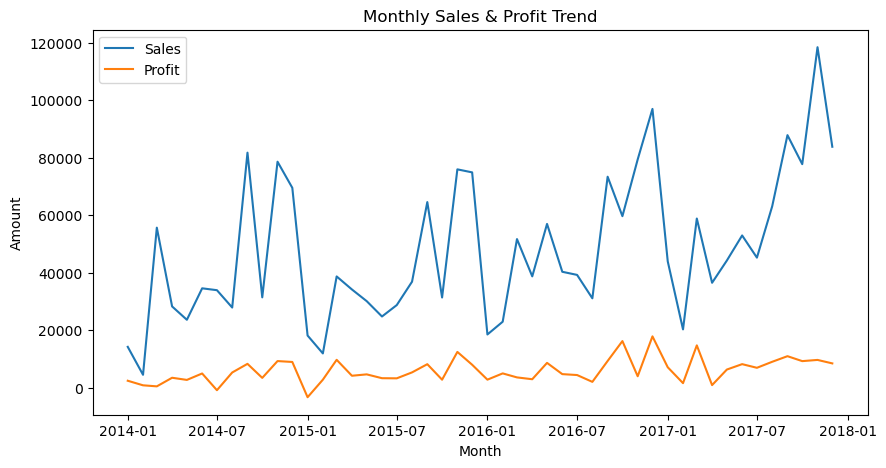

In [7]:
monthly = (
    df.groupby(df['Order_Date'].dt.to_period('M'))
      .agg({'Sales':'sum','Profit':'sum'})
      .reset_index()
)
monthly['Order_Date'] = monthly['Order_Date'].dt.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly['Order_Date'], monthly['Sales'], label='Sales')
plt.plot(monthly['Order_Date'], monthly['Profit'], label='Profit')
plt.title('Monthly Sales & Profit Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()


C:\Users\aishw\AppData\Local\Temp\ipykernel_16252\1815081203.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator='sum', ci=None)


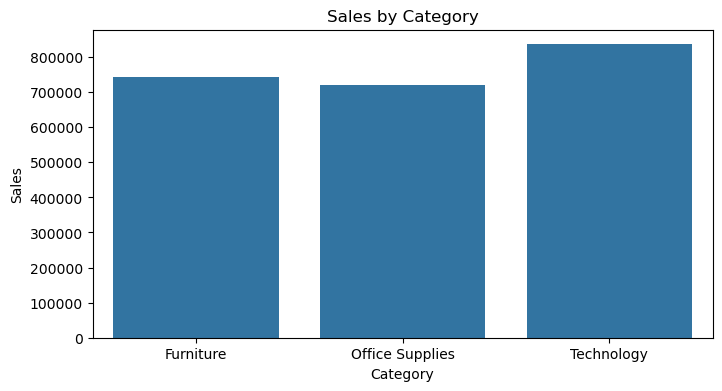

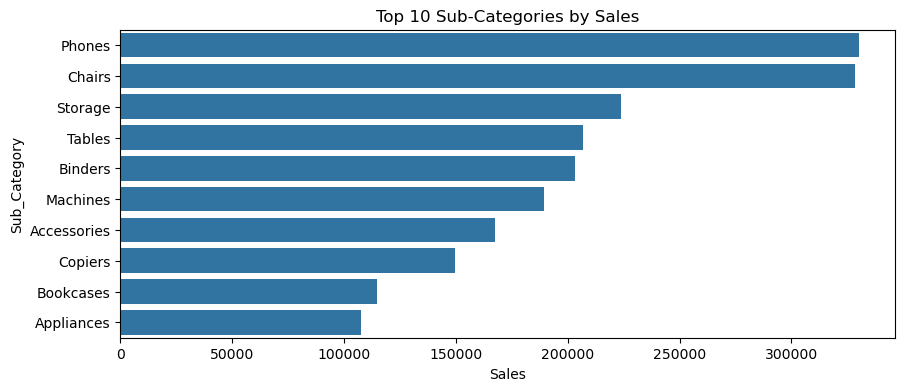

In [8]:
plt.figure(figsize=(8,4))
sns.barplot(x='Category', y='Sales', data=df, estimator='sum', ci=None)
plt.title('Sales by Category')
plt.show()

plt.figure(figsize=(10,4))
subcat = df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=subcat.values, y=subcat.index)
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Sales')
plt.show()


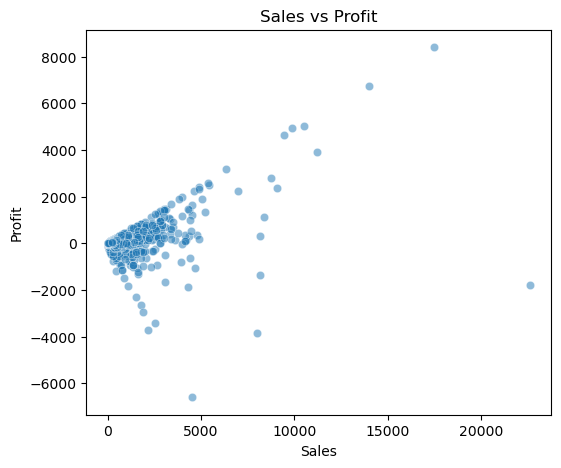

In [9]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.5)
plt.title('Sales vs Profit')
plt.show()


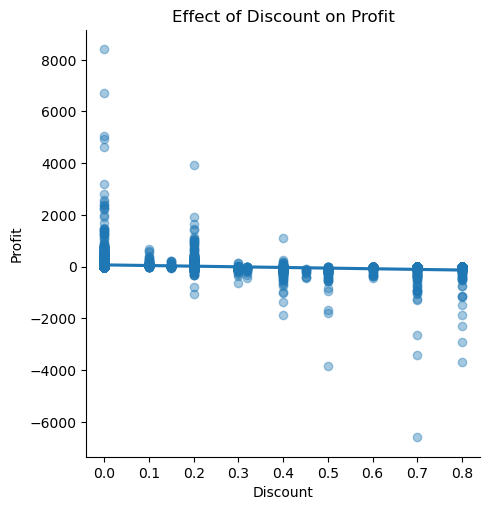

In [10]:
sns.lmplot(x='Discount', y='Profit', data=df, scatter_kws={'alpha':0.4})
plt.title('Effect of Discount on Profit')
plt.show()


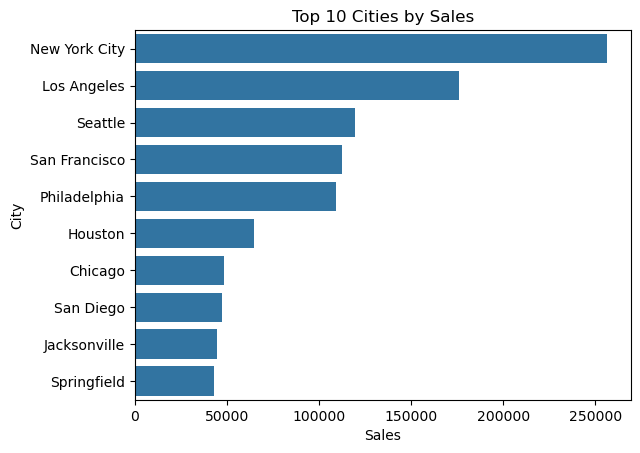

In [11]:
top_cities = df.groupby('City')['Sales'].sum().nlargest(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales')
plt.show()


In [12]:
# Save cleaned data to a new CSV
cleaned_path = r"C:\Users\aishw\OneDrive\Documents\Superstore_Cleaned.csv"
df.to_csv(cleaned_path, index=False)
print("✅ Cleaned dataset saved at:", cleaned_path)


✅ Cleaned dataset saved at: C:\Users\aishw\OneDrive\Documents\Superstore_Cleaned.csv
